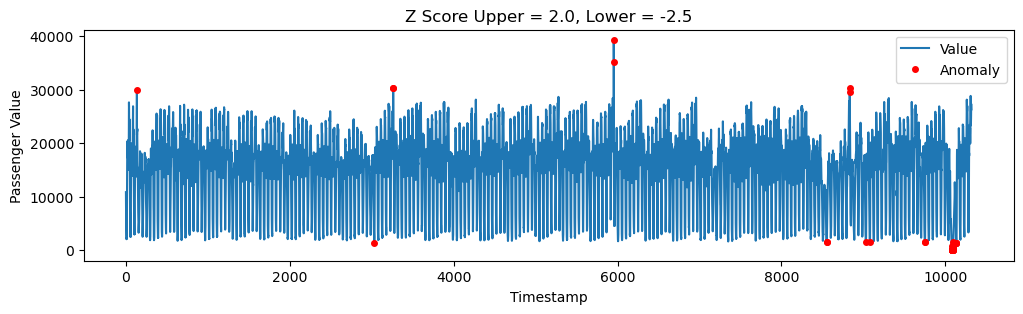

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("nyc_taxi.csv")


median = data['value'].median()
mad = np.median(np.abs(data['value'] - median))
data['robust_z_score'] = 0.6745 * (data['value'] - median) / mad


anomalies = data[(data['robust_z_score'] < -2.50) | (data['robust_z_score'] > 2.0)]


plt.figure(figsize=(12, 3))
plt.plot(data['value'], label='Value')
plt.plot(anomalies.index, anomalies['value'], 'ro', markersize=4, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Value')
plt.title('Z Score Upper = 2.0, Lower = -2.5')
plt.legend()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_109148\285516388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['robust_z_score'] = 0.6745 * (window_data['value'] - median) / mad
C:\Users\Administrator\AppData\Local\Temp\ipykernel_109148\285516388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['robust_z_score'] = 0.6745 * (window_data['value'] - median) / mad
C:\Users\Administrator\AppData\Local\Temp\ipykernel_109148\285516388.py:12: SettingWithCopyWarning: 
A value i

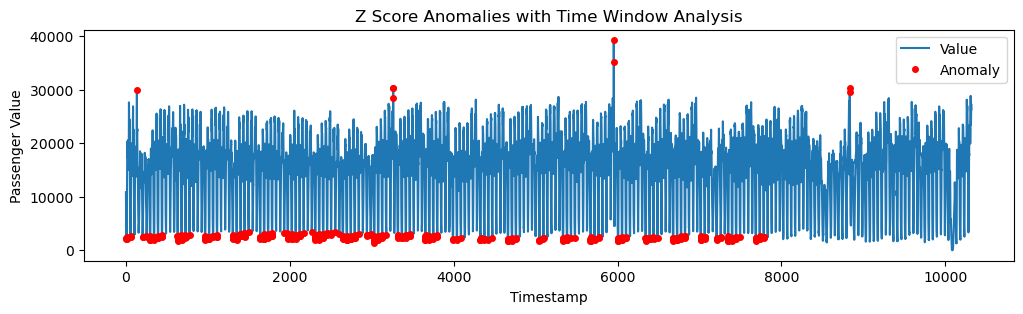

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("nyc_taxi.csv")


def detect_anomalies_in_window(window_data):
    median = window_data['value'].median()
    mad = np.median(np.abs(window_data['value'] - median))
    window_data['robust_z_score'] = 0.6745 * (window_data['value'] - median) / mad


    upper_threshold = 2.0 
    lower_threshold = -2.5

    anomalies = window_data[(window_data['robust_z_score'] < lower_threshold) | (window_data['robust_z_score'] > upper_threshold)]
    return anomalies


window_size = 1300


anomaly_indices = []
for i in range(0, len(data), window_size):
    window_data = data.iloc[i:i+window_size]
    window_anomalies = detect_anomalies_in_window(window_data)
    anomaly_indices.extend(window_anomalies.index)

plt.figure(figsize=(12, 3))
plt.plot(data['value'], label='Value')
plt.plot(anomaly_indices, data.loc[anomaly_indices, 'value'], 'ro', markersize=4, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Value')
plt.title('Z Score Anomalies with Time Window Analysis')
plt.legend()
plt.show()